<a href="https://colab.research.google.com/github/yumnazakkiya/TMDB_PROJECT/blob/main/EDA/EDA_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [ ]:
# Install jika belum tersedia
!pip install seaborn plotly --quiet

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Load stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploades = files.upload()

Saving preprocessed_tmdb.csv to preprocessed_tmdb.csv


In [ ]:
# Load dataset
df = pd.read_csv('preprocessed_tmdb.csv',  delimiter=";")

# Tampilkan 5 data awal
df.head()

,id,title,overview,popularity,vote_average,vote_count,release_date,country,label,cleaned_overview,no_stopwords,tokens,final_overview
0,1233413,Sinners,"Trying to leave their troubled lives behind, t...",4.997.936,7.500,1163,16/04/2025,United States of America,horror,trying to leave their troubled lives behind tw...,trying leave troubled lives behind twin brothe...,"['trying', 'leave', 'troubled', 'lives', 'behi...",trying leave troubled lives behind twin brothe...
1,574475,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",2.654.529,7.000,585,14/05/2025,United States of America,horror,plagued by a violent recurring nightmare colle...,plagued violent recurring nightmare college st...,"['plagued', 'violent', 'recurring', 'nightmare...",plagued violent recurring nightmare college st...
2,1284120,The Ugly Stepsister,In a fairy-tale kingdom where beauty is a brut...,1.924.116,7.100,128,07/03/2025,Denmark,horror,in a fairytale kingdom where beauty is a bruta...,fairytale kingdom beauty brutal business elvir...,"['fairytale', 'kingdom', 'beauty', 'brutal', '...",fairytale kingdom beauty brutal business elvir...
3,568770,The Containment,A girl is possessed by a dark and mysterious e...,1.137.875,7.778,9,05/06/2025,Mexico,horror,a girl is possessed by a dark and mysterious e...,girl possessed dark mysterious entity fight el...,"['girl', 'possessed', 'dark', 'mysterious', 'e...",girl possessed dark mysterious entity fight el...
4,1232546,Until Dawn,One year after her sister Melanie mysteriously...,1.284.101,6.509,585,23/04/2025,United States of America,horror,one year after her sister melanie mysteriously...,one year sister melanie mysteriously disappear...,"['one', 'year', 'sister', 'melanie', 'mysterio...",one year sister melanie mysteriously disappear...


In [ ]:
# Cek dimensi data
print(df.shape)

# Cek missing values
print(df.isnull().sum())

# Cek duplikasi
print(df.duplicated().sum())

(10271, 13)
id                  0
title               0
overview            0
popularity          0
vote_average        0
vote_count          0
release_date        0
country             0
label               0
cleaned_overview    0
no_stopwords        0
tokens              0
final_overview      0
dtype: int64
0


<ipython-input-6-f9ecd242ed74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='text_length', palette='coolwarm')


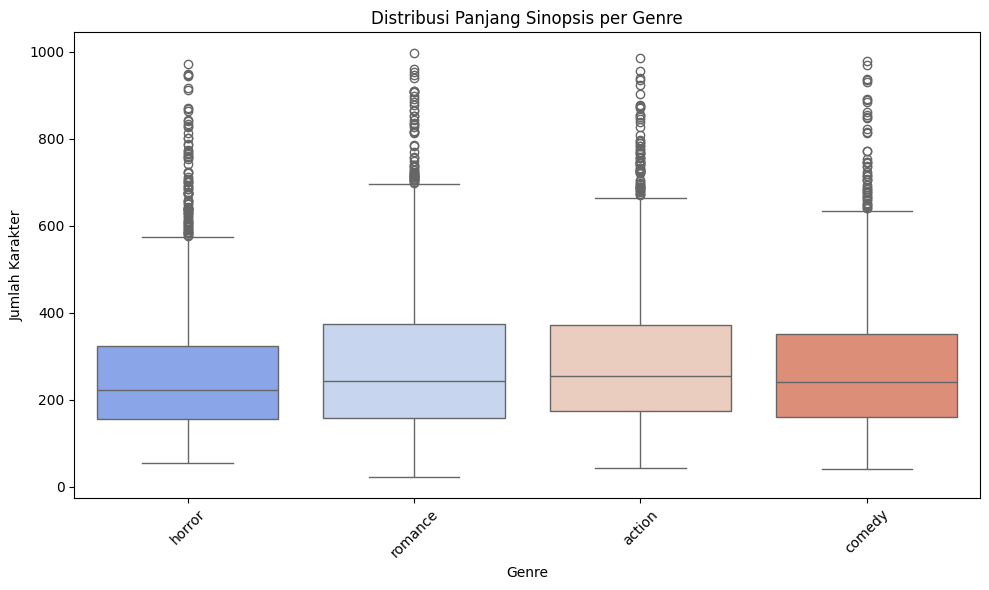

In [ ]:
df['text_length'] = df['overview'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='label', y='text_length', palette='coolwarm')
plt.title('Distribusi Panjang Sinopsis per Genre')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Karakter')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

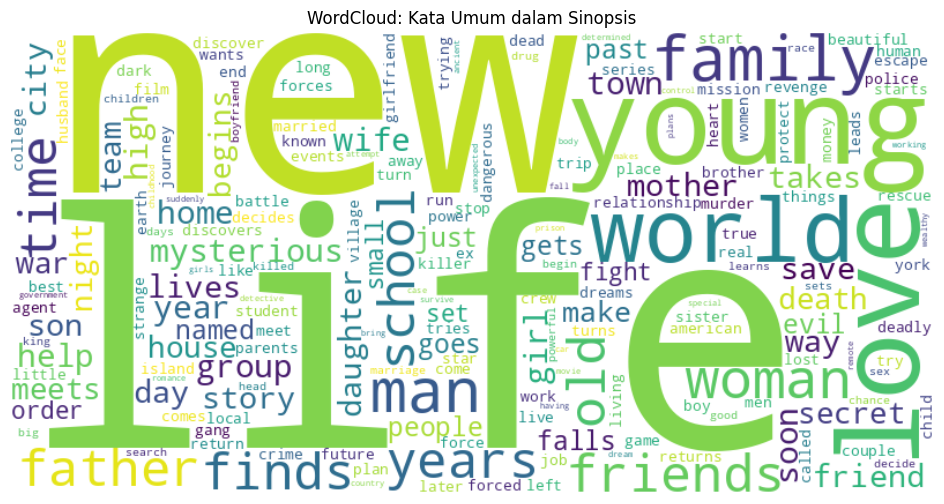

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

cv = CountVectorizer(stop_words='english', max_features=1000)
X_cv = cv.fit_transform(df['overview'].fillna(''))
word_freq = X_cv.toarray().sum(axis=0)
words = cv.get_feature_names_out()

# Wordcloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, word_freq)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: Kata Umum dalam Sinopsis")
plt.show()

In [ ]:
from collections import Counter
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def top_keywords_by_label(df, label, n=10):
    text = ' '.join(df[df['label'] == label]['overview'].astype(str).tolist()).lower()
    tokens = [word.strip(string.punctuation) for word in text.split()]
    keywords = [w for w in tokens if w not in stop_words and w.isalpha()]
    return Counter(keywords).most_common(n)

# Contoh
top_keywords_by_label(df, 'romance')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('love', 891),
 ('life', 614),
 ('young', 470),
 ('one', 444),
 ('new', 415),
 ('two', 369),
 ('man', 362),
 ('woman', 360),
 ('meets', 260),
 ('finds', 256)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-4781b07ef34c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


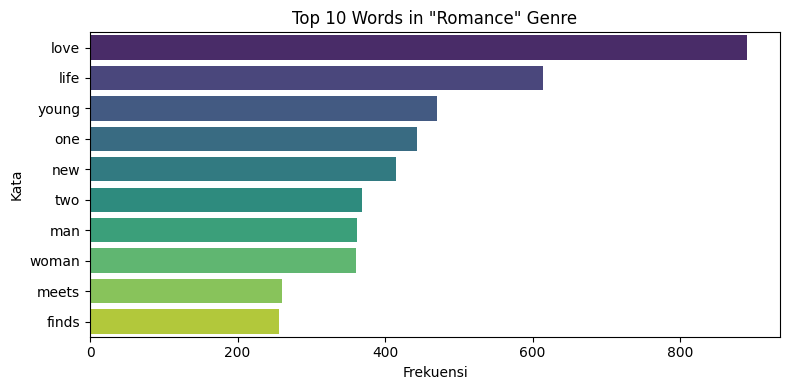

<ipython-input-9-4781b07ef34c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


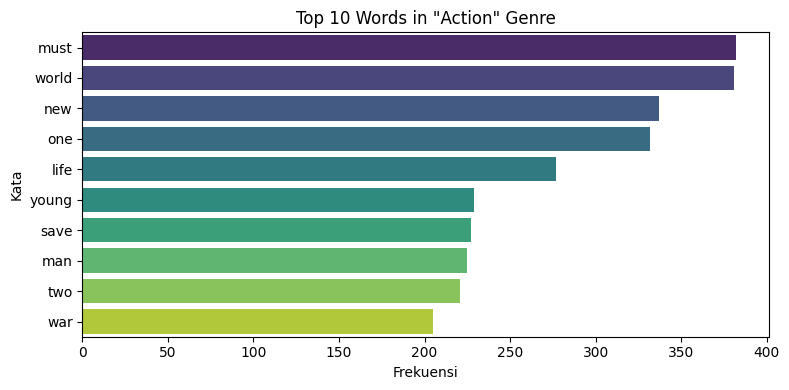

<ipython-input-9-4781b07ef34c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


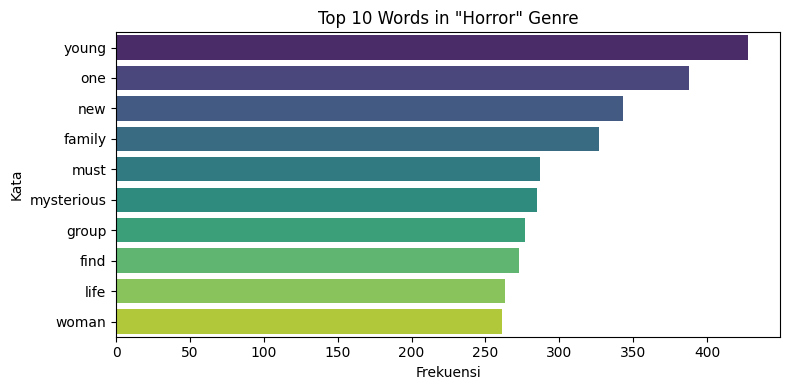

<ipython-input-9-4781b07ef34c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


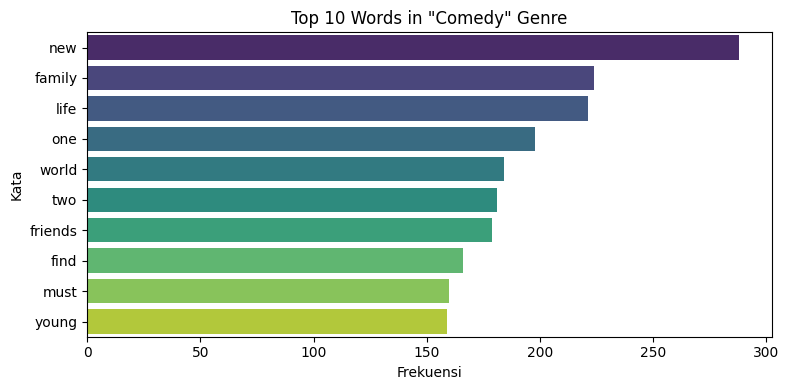

In [ ]:
from collections import Counter
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=10):
    tokens = []
    for text in texts:
        words = str(text).lower().translate(str.maketrans('', '', string.punctuation)).split()
        tokens += [w for w in words if w.isalpha() and w not in stop_words]
    return Counter(tokens).most_common(n)

# Loop untuk beberapa genre (misal: romance, action, horror, comedy)
selected_genres = ['romance', 'action', 'horror', 'comedy']
top_n = 10

for genre in selected_genres:
    top_words = get_top_words(df[df['label'] == genre]['overview'], n=top_n)
    words, counts = zip(*top_words)

    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {top_n} Words in "{genre.title()}" Genre')
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')
    plt.tight_layout()
    plt.show()

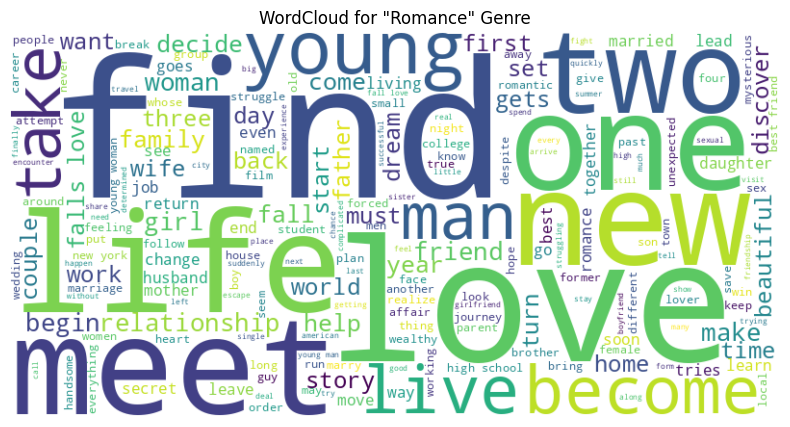

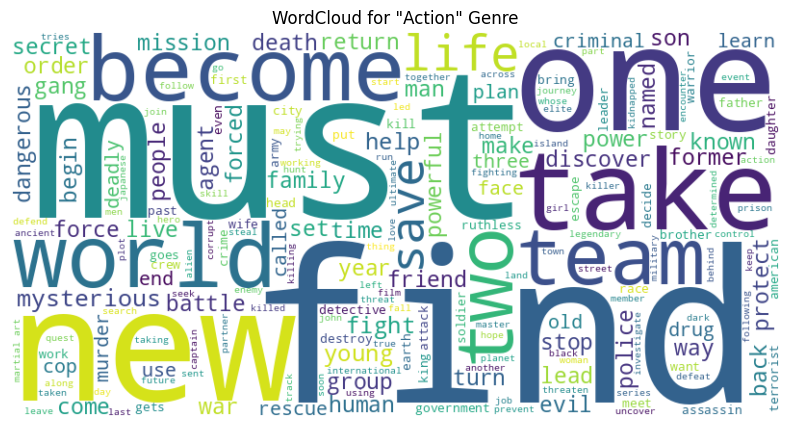

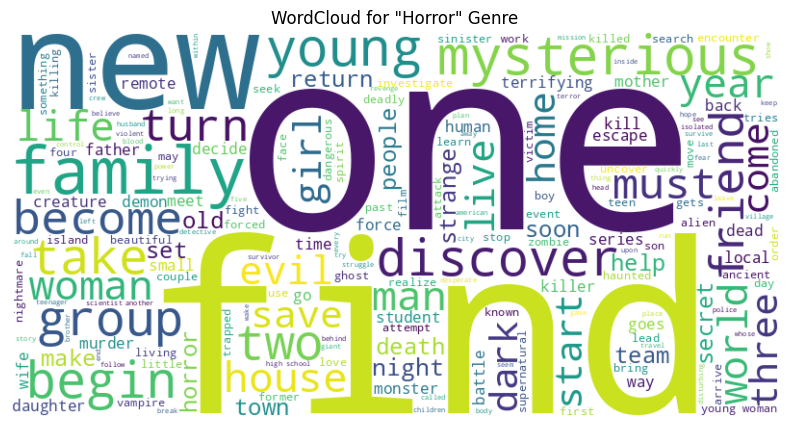

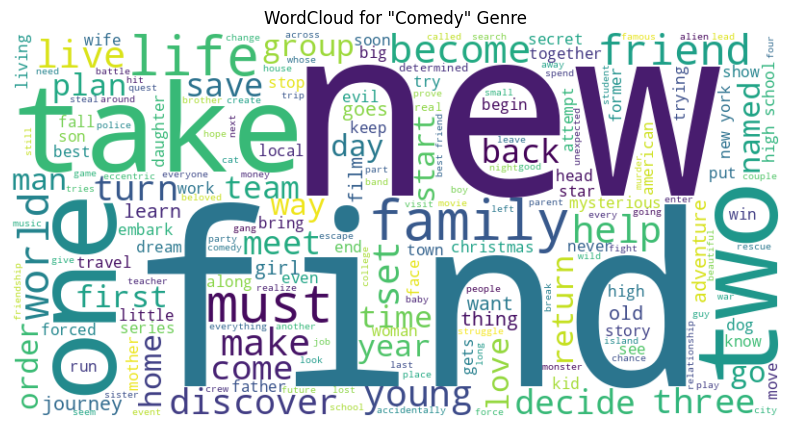

In [ ]:
from wordcloud import WordCloud

for genre in selected_genres:
    text = ' '.join(df[df['label'] == genre]['overview'].astype(str).tolist()).lower()
    words = [w for w in text.split() if w.isalpha() and w not in stop_words]
    joined_text = ' '.join(words)

    wc = WordCloud(width=800, height=400, background_color='white').generate(joined_text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for "{genre.title()}" Genre')
    plt.show()

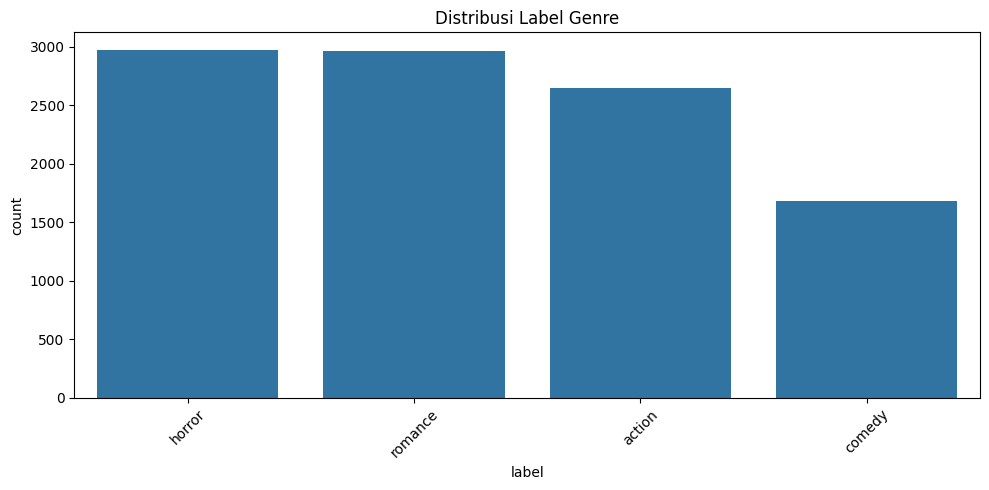

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title('Distribusi Label Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

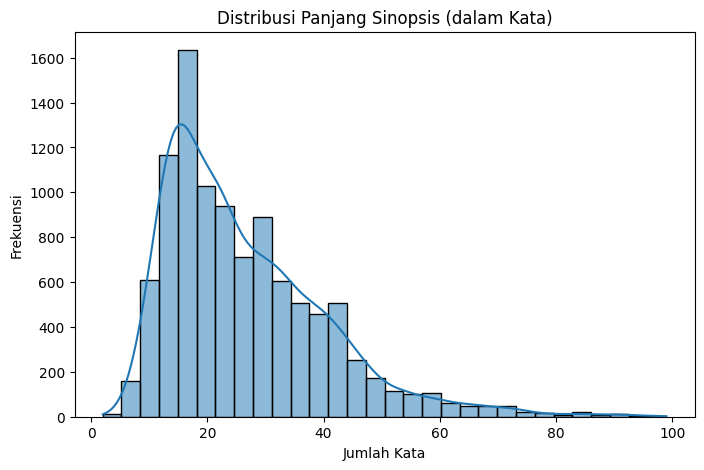

In [ ]:
df['text_length'] = df['final_overview'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribusi Panjang Sinopsis (dalam Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

TRAINING

In [ ]:
# 1. Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 2. Load dataset
df = pd.read_csv("/content/preprocessed_tmdb.csv",  delimiter=";")

In [ ]:
# 3: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['no_stopwords'])

print("Shape matrix TF-IDF:", tfidf_matrix.shape)
print("Contoh fitur:", tfidf.get_feature_names_out()[:10])

Shape matrix TF-IDF: (10271, 5000)
Contoh fitur: ['aaron' 'abandoned' 'abby' 'abducted' 'abigail' 'abilities' 'ability'
 'able' 'aboard' 'abroad']


In [ ]:
# 4. Encode label
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
# 5. TF-IDF untuk model non-neural
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['final_overview'])
y = df['label']

In [ ]:
# 6. Split untuk non-neural model
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# 7. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_tfidf)
nb_preds = nb_model.predict(X_test_tfidf)
print("=== Naive Bayes ===")
print(classification_report(y_test_tfidf, nb_preds, target_names=le.classes_))

=== Naive Bayes ===
              precision    recall  f1-score   support

      action       0.69      0.78      0.74       505
      comedy       0.79      0.16      0.27       348
      horror       0.73      0.81      0.77       590
     romance       0.65      0.82      0.73       612

    accuracy                           0.69      2055
   macro avg       0.72      0.64      0.62      2055
weighted avg       0.71      0.69      0.66      2055



In [ ]:
# 8. Logistic Regression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train_tfidf)
lr_preds = lr_model.predict(X_test_tfidf)
print("=== Logistic Regression ===")
print(classification_report(y_test_tfidf, lr_preds, target_names=le.classes_))

=== Logistic Regression ===
              precision    recall  f1-score   support

      action       0.69      0.76      0.73       505
      comedy       0.63      0.32      0.43       348
      horror       0.75      0.81      0.78       590
     romance       0.69      0.77      0.73       612

    accuracy                           0.70      2055
   macro avg       0.69      0.67      0.66      2055
weighted avg       0.70      0.70      0.69      2055



In [ ]:
# 9. Random Forest

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train_tfidf)
rf_preds = rf_model.predict(X_test_tfidf)
print("=== Random Forest ===")
print(classification_report(y_test_tfidf, rf_preds, target_names=le.classes_))

=== Random Forest ===
              precision    recall  f1-score   support

      action       0.59      0.70      0.64       505
      comedy       0.50      0.17      0.26       348
      horror       0.68      0.70      0.69       590
     romance       0.63      0.75      0.68       612

    accuracy                           0.63      2055
   macro avg       0.60      0.58      0.57      2055
weighted avg       0.61      0.63      0.60      2055



In [ ]:
# 10. SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train_tfidf)
svm_preds = svm_model.predict(X_test_tfidf)
print("=== Support Vector Machine ===")
print(classification_report(y_test_tfidf, svm_preds, target_names=le.classes_))

=== Support Vector Machine ===
              precision    recall  f1-score   support

      action       0.68      0.70      0.69       505
      comedy       0.53      0.41      0.46       348
      horror       0.71      0.77      0.74       590
     romance       0.67      0.69      0.68       612

    accuracy                           0.67      2055
   macro avg       0.65      0.64      0.64      2055
weighted avg       0.66      0.67      0.66      2055



In [ ]:
# 11. Tokenisasi untuk Neural Network
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['final_overview'])
sequences = tokenizer.texts_to_sequences(df['final_overview'])
X_seq = pad_sequences(sequences, maxlen=200)
y_seq = df['label']

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

vocab_size = 5000
embedding_dim = 64
max_length = 200

In [ ]:
# 12. ANN
ann_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.fit(X_train_seq, y_train_seq, epochs=5, validation_data=(X_test_seq, y_test_seq), verbose=1)
ann_preds = ann_model.predict(X_test_seq)
ann_preds_classes = ann_preds.argmax(axis=1)
print("=== ANN ===")
print(classification_report(y_test_seq, ann_preds_classes, target_names=le.classes_))

Epoch 1/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2895 - loss: 1.3666 - val_accuracy: 0.2978 - val_loss: 1.3572
Epoch 2/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3301 - loss: 1.3536 - val_accuracy: 0.3932 - val_loss: 1.3311
Epoch 3/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4053 - loss: 1.3001 - val_accuracy: 0.5713 - val_loss: 1.2489
Epoch 4/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5000 - loss: 1.1931 - val_accuracy: 0.5499 - val_loss: 1.1096
Epoch 5/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5906 - loss: 1.0134 - val_accuracy: 0.4749 - val_loss: 1.1298
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
=== ANN ===
              precision    recall  f1-score   support

      action       0.34      0.95      0.50       505
      comedy       0.50      0.02      0.03       348
      horror       0.94      0.17      0.29       590
     romance       0.74      0.63      0.68       612

    accuracy                          

In [ ]:
# 13. GRU
gru_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(64),
    Dense(len(le.classes_), activation='softmax')
])
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.fit(X_train_seq, y_train_seq, epochs=5, validation_data=(X_test_seq, y_test_seq), verbose=1)
gru_preds = gru_model.predict(X_test_seq)
gru_preds_classes = gru_preds.argmax(axis=1)
print("=== GRU ===")
print(classification_report(y_test_seq, gru_preds_classes, target_names=le.classes_))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


257/257 ━━━━━━━━━━━━━━━━━━━━ 45s 162ms/step - accuracy: 0.3879 - loss: 1.2963 - val_accuracy: 0.6248 - val_loss: 0.9539
Epoch 2/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 80s 155ms/step - accuracy: 0.7373 - loss: 0.6928 - val_accuracy: 0.6564 - val_loss: 0.9019
Epoch 3/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.8498 - loss: 0.4423 - val_accuracy: 0.6287 - val_loss: 1.0416
Epoch 4/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.8922 - loss: 0.3134 - val_accuracy: 0.6277 - val_loss: 1.1928
Epoch 5/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.9378 - loss: 0.1937 - val_accuracy: 0.6248 - val_loss: 1.4136
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
=== GRU ===
              precision    recall  f1-score   support

      action       0.63      0.64      0.64       505
      comedy       0.39      0.27      0.32       348
      horror       0.67      0.74      0.70       590
     romance       0.66      0.70      0.68       612

    accuracy                        

In [ ]:
# 14. LSTM

bilstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(len(le.classes_), activation='softmax')
])
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.fit(X_train_seq, y_train_seq, epochs=5, validation_data=(X_test_seq, y_test_seq), verbose=1)
print("=== LSTM ===")
print(classification_report(y_test_seq, gru_preds_classes, target_names=le.classes_))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


257/257 ━━━━━━━━━━━━━━━━━━━━ 69s 254ms/step - accuracy: 0.4199 - loss: 1.2508 - val_accuracy: 0.6258 - val_loss: 0.9321
Epoch 2/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 79s 242ms/step - accuracy: 0.7412 - loss: 0.6854 - val_accuracy: 0.6545 - val_loss: 0.8740
Epoch 3/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 83s 246ms/step - accuracy: 0.8302 - loss: 0.4756 - val_accuracy: 0.6526 - val_loss: 0.9421
Epoch 4/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 82s 249ms/step - accuracy: 0.8952 - loss: 0.3193 - val_accuracy: 0.6365 - val_loss: 1.1618
Epoch 5/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 83s 253ms/step - accuracy: 0.9285 - loss: 0.2240 - val_accuracy: 0.6380 - val_loss: 1.3128
=== LSTM ===
              precision    recall  f1-score   support

      action       0.63      0.64      0.64       505
      comedy       0.39      0.27      0.32       348
      horror       0.67      0.74      0.70       590
     romance       0.66      0.70      0.68       612

    accuracy                           0.62      2055
   macro avg       0.

In [ ]:
# 15. BiLSTM

bilstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(len(le.classes_), activation='softmax')
])
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.fit(X_train_seq, y_train_seq, epochs=5, validation_data=(X_test_seq, y_test_seq), verbose=1)

bilstm_preds = bilstm_model.predict(X_test_seq)
bilstm_preds_classes = bilstm_preds.argmax(axis=1)
print("=== BiLSTM ===")
print(classification_report(y_test_seq, bilstm_preds_classes, target_names=le.classes_))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


257/257 ━━━━━━━━━━━━━━━━━━━━ 71s 258ms/step - accuracy: 0.4124 - loss: 1.2599 - val_accuracy: 0.6360 - val_loss: 0.8951
Epoch 2/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 80s 251ms/step - accuracy: 0.7277 - loss: 0.7015 - val_accuracy: 0.6511 - val_loss: 0.8975
Epoch 3/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 65s 253ms/step - accuracy: 0.8205 - loss: 0.4922 - val_accuracy: 0.6448 - val_loss: 0.9785
Epoch 4/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 64s 250ms/step - accuracy: 0.8859 - loss: 0.3479 - val_accuracy: 0.6316 - val_loss: 1.1077
Epoch 5/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 84s 259ms/step - accuracy: 0.9213 - loss: 0.2553 - val_accuracy: 0.6214 - val_loss: 1.2240
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step
=== BiLSTM ===
              precision    recall  f1-score   support

      action       0.64      0.65      0.64       505
      comedy       0.40      0.47      0.43       348
      horror       0.69      0.70      0.69       590
     romance       0.70      0.62      0.65       612

    accuracy                     

Eskperiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Simpan semua hasil evaluasi dalam dictionary
model_names = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'SVM', 'ANN', 'GRU', 'BiLSTM']
model_accuracies = [
    nb_model.score(X_test_tfidf, y_test_tfidf),
    lr_model.score(X_test_tfidf, y_test_tfidf),
    rf_model.score(X_test_tfidf, y_test_tfidf),
    svm_model.score(X_test_tfidf, y_test_tfidf),
    ann_model.evaluate(X_test_seq, y_test_seq, verbose=0)[1],
    gru_model.evaluate(X_test_seq, y_test_seq, verbose=0)[1],
    bilstm_model.evaluate(X_test_seq, y_test_seq, verbose=0)[1]
]

In [ ]:
# Buat DataFrame hasil
results_df = pd.DataFrame(list(zip(model_names, model_accuracies)), columns=["Model", "Akurasi"])
results_df.sort_values(by="Akurasi", ascending=False, inplace=True)

<ipython-input-69-04ddc7bfc8aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Akurasi', y='Model', palette='rocket')


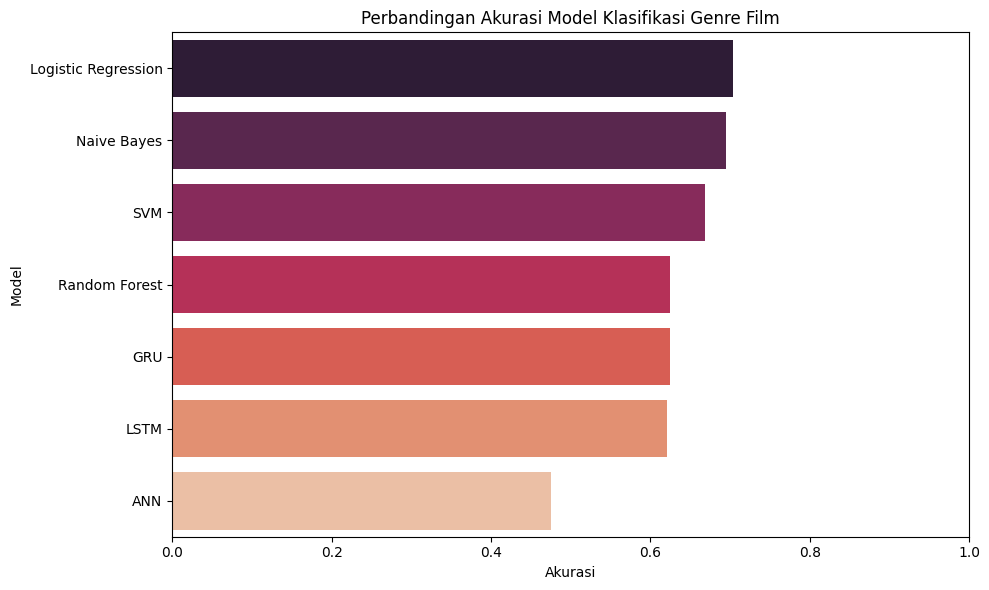

In [ ]:
# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Akurasi', y='Model', palette='rocket')
plt.title("Perbandingan Akurasi Model Klasifikasi Genre Film")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Tampilkan tabel akurasi
results_df.reset_index(drop=True)

,Model,Akurasi
0,Logistic Regression,0.703650
1,Naive Bayes,0.694891
2,SVM,0.668613
3,Random Forest,0.625304
4,GRU,0.624817
5,BiLSTM,0.621411
6,ANN,0.474939


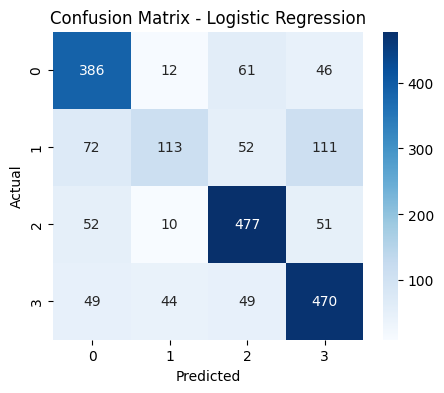

In [ ]:
# Prediksi (contoh untuk model Logistic Regression)
y_pred = lr_model.predict(X_test_tfidf)

# Buat confusion matrix
cm = confusion_matrix(y_test_tfidf, y_pred)

# Visualisasi
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()